## Machine Learning Application - Handwritten Digits

Unsupervised learning, techniques covered:
 - PCA, dimensionality reduction;
 - K-means, clustering;
 - t-SNE, 2D visualizing (not covered in our "syllabus"), an algorithm invented at UofT.

Reference:
 - [A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#a-demo-of-k-means-clustering-on-the-handwritten-digits-data).
 - PHY2109 2022 Fall, tutorial by Dr. Duncan Kirby in Prof. Anton Zilman's group.

In [28]:
# DATASET: MNIST is a set of images of handwritten digits.
from sklearn import datasets

import numpy as np
# properties of the dataset
data, labels = datasets.load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}\n\n")
# Digits: from 0 to 9, 10 in total. Number of samples: 1797. The dimensionality of one sample: 8*8=64.

# If you want a complete description of the dataset, use
# print(digits.DESCR)

digits = datasets.load_digits()
# Let's see what the first sample in the data set looks like
print("The vector of the sample #0 (a larger number means a darker color in this pixel):")
print(digits.data[0])

print("\nThe label of the sample #0 (what digit it corresponds to?):")
print(digits.target[0])

# digits: 10; # samples: 1797; # features 64


The vector of the sample #0 (a larger number means a darker color in this pixel):
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

The label of the sample #0 (what digit it corresponds to?):
0


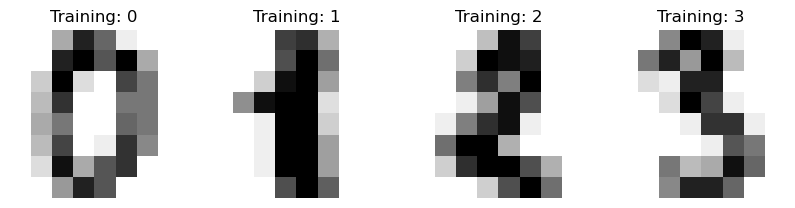

In [4]:
# What the first four samples look like
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### PCA

Now let's perform PCA. From our meeting, if the dimensionality is 64, the covariance matrix will be 64*64. What are those eigenvalues? Here, we assort eigenvalues from large to small, and plot "eigenvalue #i / sum of all 64 eigenvalues".

Text(0, 0.5, 'Eigenvalue ratios')

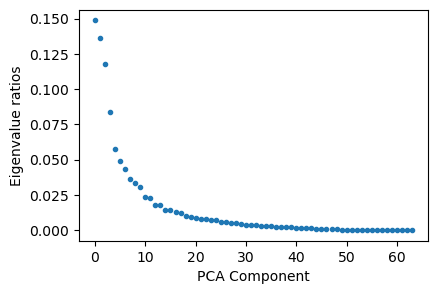

In [15]:
from sklearn.decomposition import PCA
# PCA
PCA_digits = PCA().fit(digits.data)

# Plot the explained variance for each PCA component
fig, ax = plt.subplots(figsize=(4.5, 3))
plt.plot(PCA_digits.explained_variance_ratio_,".", c='tab:blue')
ax.set_xlabel('PCA Component')
ax.set_ylabel('Eigenvalue ratios')

We then only keep the largest eigenvalues which take up 95% of the sum eigenvalues. Then how many dimensions are left? 

In [18]:
pca_95 = PCA(0.95).fit(digits.data).transform(digits.data)
print("After dimensionality reduction, the we keep only ", pca_95.shape[1], " dimensions.\n")

After dimensionality reduction, the we keep only  29  dimensions.



### K-means

Now, let's do K-means to cluster these 1797 samples in 29-D space. The labels of each sample are stored in "kmeans.labels_".

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)  # 假设要聚成10类，可以根据实际情况调整
kmeans.fit(pca_95)

print("There are ", data.shape[0], " samples, and ", kmeans.labels_.shape[0], "labels.")
print("The list of labels of the samples: ")
print(kmeans.labels_)

There are  1797  samples, and  1797 labels.
The list of labels of the samples: 
[6 3 3 ... 3 7 7]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualize the result

Then, let's visualize our result of clustering the 29-D samples. How to plot 29-D data on a 2-D plot? Surely, you can use PCA and keep only the largest two eigenvalues to reduce them in a 2-D space. However, in fact, the largest two eigenvalues usually cannot represent high-dimensional data well. Here, we introduce [t-SNE]() to visualize the data in a 2-D plot. 

We use colors to indicate the labels of the samples. We will compare the **clustered** and **original** labels to see how well K-means works.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.178451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.145462
[t-SNE] KL divergence after 1000 iterations: 0.745059


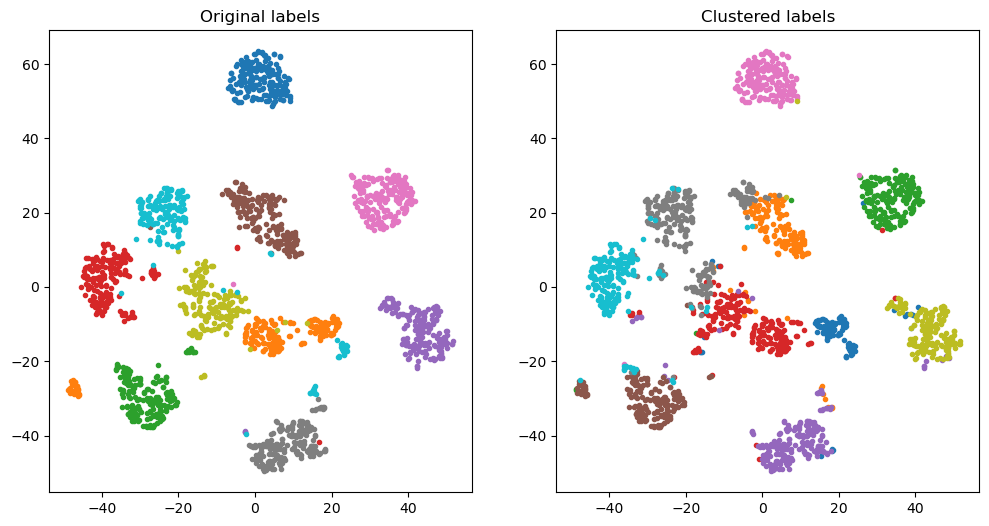

In [32]:
# tSNE reduction
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1).fit_transform(pca_95)

# Plot each projection
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for label in set(digits.target):
    original = digits.target==label
    ax[0].scatter(tsne[:,0][original], tsne[:,1][original], marker = '.', label = label)
    ax[0].set_title('Original labels')

for kmeans_label in set(kmeans.labels_):
    clustered = kmeans.labels_==kmeans_label
    ax[1].scatter(tsne[:,0][clustered], tsne[:,1][clustered], marker = '.', label = label)
    ax[1].set_title('Clustered labels')
